# Predicting Draft Round for College Football Players
## Chris Kourkoulakos, Brown University 2025

## Reading in the Data

In [831]:
import pandas as pd
import numpy as np


# DRAFTED PLAYERS PASSING
drafted_passing = pd.read_csv('Data/DRAFTED CFB PLAYERS PASSING.CSV', header = 1)
drafted_passing = drafted_passing.drop(['Rk', 'Draft Year', 'Draft Team', 'Pick', 'Draft College', 'TD.1'], axis= 1)
drafted_passing.rename(columns={'TD':'Pass_TD', 'Att': 'Pass_Att', 'Yds': 'Pass_Yds', 'Y/A':'Pass_Y/A', 'Y/G':'Pass_Y/G', \
                                'AY/A':'Pass_AY/A', 'Y/C':'Pass_Y/C'}, inplace=True)
drafted_passing['Round'] = drafted_passing['Round'].astype('Int64')

# EDA
print(drafted_passing.head())

print()
print('Dimensions of data:')
print(drafted_passing.shape)

print()
print('Columns in data set:')
print(drafted_passing.columns)

print()
perc_missing_per_ftr = drafted_passing.isnull().sum(axis=0)/drafted_passing.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

print()
print('Data types:')
print(drafted_passing.dtypes)

print()
print('Count per round:')
print(drafted_passing['Round'].value_counts())

print()
print('Summary Stats for Pass_Yds:')
print(drafted_passing['Pass_Yds'].describe())


           Player  Pass_TD  Round  From    To   G   Cmp  Pass_Att  Inc  Cmp%  \
0  Baker Mayfield      131      1  2013  2017  48  1026      1497  471  68.5   
1    Colt Brennan      131      6  2005  2007  38  1115      1584  469  70.4   
2    Landry Jones      123      4  2009  2012  53  1388      2183  795  63.6   
3    Aaron Murray      121      5  2010  2013  52   921      1478  557  62.3   
4       Ty Detmer      121      9  1988  1991  48   958      1530  572  62.6   

   ...  Int  TD%  Int%   Rate  Pass_Y/A  Pass_AY/A  Pass_Y/C  Pass_Y/G  Pos  \
0  ...   30  8.8   2.0  175.4       9.8      10.61      14.2     304.3   QB   
1  ...   42  8.3   2.7  167.6       9.0       9.42      12.7     373.5   QB   
2  ...   52  5.6   2.4  141.5       7.6       7.68      12.0     314.1   QB   
3  ...   41  8.2   2.8  158.6       8.9       9.30      14.3     253.2   QB   
4  ...   65  7.9   4.2  162.7       9.8       9.49      15.7     313.1   QB   

                  Team  
0  Oklahoma,Texas T

In [832]:
# DRAFTED PLAYERS RUSHING
drafted_rushing = pd.read_csv('Data/DRAFTED CFB PLAYERS RUSHING.CSV', header = 1)
drafted_rushing = drafted_rushing.drop(['Rk', 'Draft Year', 'Draft Team', 'Pick', 'Draft College', 'Yds.1'], axis=1)
drafted_rushing.rename(columns={'TD':'Rush_TD', 'Yds':'Rush_Yds', 'Att':'Rush_Att', 'Y/A':'Rush_Y/A', 'Y/G':'Rush_Y/G'}, inplace=True)
drafted_rushing['Round'] = drafted_rushing['Round'].astype('Int64')

# EDA
print(drafted_rushing.head())

print()
print('Dimensions of data:')
print(drafted_rushing.shape)

print()
print('Columns in data set:')
print(drafted_rushing.columns)

print()
perc_missing_per_ftr = drafted_rushing.isnull().sum(axis=0)/drafted_rushing.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

print()
print('Data types:')
print(drafted_rushing.dtypes)

print()
print('Count per round:')
print(drafted_rushing['Round'].value_counts())

print()
print('Summary Stats for Rush_Yds:')
print(drafted_rushing['Rush_Yds'].describe())




            Player  Rush_Yds  Round  From    To   G  Rush_Att  Rush_Y/A  \
0     Mike Garrett      6442     20  1963  1965  60      1224       5.3   
1  Donnel Pumphrey      6405      4  2013  2016  54      1059       6.0   
2        Ron Dayne      6397      1  1996  1999  43      1115       5.7   
3   Ricky Williams      6279      1  1995  1998  46      1011       6.2   
4  Jonathan Taylor      6174      2  2017  2019  41       926       6.7   

   Rush_TD  Rush_Y/G Pos             Team  
0       50     107.4  RB              USC  
1       62     118.6  RB  San Diego State  
2       63     148.8  RB        Wisconsin  
3       72     136.5  RB            Texas  
4       50     150.6  RB        Wisconsin  

Dimensions of data:
(2000, 12)

Columns in data set:
Index(['Player', 'Rush_Yds', 'Round', 'From', 'To', 'G', 'Rush_Att',
       'Rush_Y/A', 'Rush_TD', 'Rush_Y/G', 'Pos', 'Team'],
      dtype='object')

fraction of missing values in features:
Round    0.0250
Pos      0.0015
dtype: fl

In [833]:
# DRAFTED PLAYERS RECEIVING
drafted_receiving = pd.read_csv('Data/DRAFTED CFB PLAYERS RECEIVING.CSV', header=1)
drafted_receiving = drafted_receiving.drop(['Rk', 'Draft Year', 'Draft Team', 'Pick', 'Draft College', 'Yds.1'], axis=1)
drafted_receiving.rename(columns={'TD':'Rec_TD', 'Yds':'Rec_Yds', 'Y/G':'Rec_Y/G'}, inplace=True)
drafted_receiving['Round'] = drafted_receiving['Round'].astype('Int64')

# EDA
print(drafted_receiving.head())

print()
print('Dimensions of data:')
print(drafted_receiving.shape)

print()
print('Columns in data set:')
print(drafted_receiving.columns)

print()
perc_missing_per_ftr = drafted_receiving.isnull().sum(axis=0)/drafted_receiving.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

print()
print('Data types:')
print(drafted_receiving.dtypes)

print()
print('Count per round:')
print(drafted_receiving['Round'].value_counts())

print()
print('Summary Stats for Rec_Yds:')
print(drafted_receiving['Rec_Yds'].describe())




           Player  Rec_Yds  Round  From    To   G  Rec   Y/R  Rec_TD  Rec_Y/G  \
0  Howard Twilley     6686     12  1963  1965  60  522  12.8      64    111.4   
1     Corey Davis     5285      1  2013  2016  50  332  15.9      52    105.7   
2    Ryan Broyles     4586      2  2008  2011  48  349  13.1      45     95.5   
3    Justin Hardy     4541      4  2011  2014  49  387  11.7      35     92.7   
4    Jacob Cowing     4477      4  2019  2023  58  316  14.2      33     77.2   

  Pos              Team  
0  WR             Tulsa  
1  WR  Western Michigan  
2  WR          Oklahoma  
3  WR     East Carolina  
4  WR      Arizona,UTEP  

Dimensions of data:
(3000, 12)

Columns in data set:
Index(['Player', 'Rec_Yds', 'Round', 'From', 'To', 'G', 'Rec', 'Y/R', 'Rec_TD',
       'Rec_Y/G', 'Pos', 'Team'],
      dtype='object')

fraction of missing values in features:
Round    0.014000
Pos      0.007333
dtype: float64

Data types:
Player      object
Rec_Yds      int64
Round        Int64
From 

In [834]:
# UNDRAFTED PLAYERS PASSING
undrafted_passing = pd.read_csv('Data/UNDRAFTED CFB PLAYERS PASSING.CSV', header = 1)
undrafted_passing = undrafted_passing.drop(['Rk', 'TD.1'], axis= 1)
undrafted_passing.rename(columns={'TD':'Pass_TD', 'Att': 'Pass_Att', 'Yds': 'Pass_Yds', 'Y/A':'Pass_Y/A', 'Y/G':'Pass_Y/G', \
                                'AY/A':'Pass_AY/A', 'Y/C':'Pass_Y/C'}, inplace=True)
undrafted_passing['Round'] = 0

# EDA
print(undrafted_passing.head())

print()
print('Dimensions of data:')
print(undrafted_passing.shape)

print()
print('Columns in data set:')
print(undrafted_passing.columns)

print()
perc_missing_per_ftr = undrafted_passing.isnull().sum(axis=0)/undrafted_passing.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

print()
print('Data types:')
print(undrafted_passing.dtypes)

print()
print('Summary Stats for Pass_Yds:')
print(undrafted_passing['Pass_Yds'].describe())



           Player  Pass_TD  From    To   G   Cmp  Pass_Att  Inc  Cmp%  \
0     Case Keenum      155  2007  2011  57  1546      2229  683  69.4   
1    Kellen Moore      142  2008  2011  53  1157      1658  501  69.8   
2  Graham Harrell      134  2005  2008  45  1403      2011  608  69.8   
3     Sam Hartman      134  2018  2023  60  1135      1898  763  59.8   
4  Dillon Gabriel      131  2019  2024  53  1129      1758  629  64.2   

   Pass_Yds  ...  TD%  Int%   Rate  Pass_Y/A  Pass_AY/A  Pass_Y/C  Pass_Y/G  \
0     19217  ...  7.0   2.1  160.6       8.6       9.08      12.4     337.1   
1     14667  ...  8.6   1.7  169.0       8.8       9.80      12.7     276.7   
2     15793  ...  6.7   1.7  154.3       7.9       8.43      11.3     351.0   
3     15656  ...  7.1   2.6  147.2       8.2       8.50      13.8     260.9   
4     15779  ...  7.5   1.5  161.2       9.0       9.80      14.0     297.7   

   Pos                    Team Round  
0   QB                 Houston     0  
1   QB  

In [835]:
# UNDRAFTED PLAYERS RUSHING
undrafted_rushing = pd.read_csv('Data/UNDRAFTED CFB PLAYERS RUSHING.CSV', header = 1)
undrafted_rushing = undrafted_rushing.drop(['Rk','Yds.1'], axis=1)
undrafted_rushing.rename(columns={'TD':'Rush_TD', 'Yds':'Rush_Yds', 'Att':'Rush_Att', 'Y/A':'Rush_Y/A', 'Y/G':'Rush_Y/G'}, inplace=True)
undrafted_rushing['Round'] = 0

print(undrafted_rushing.head())

print()
print('Dimensions of data:')
print(undrafted_rushing.shape)

print()
print('Columns in data set:')
print(undrafted_rushing.columns)

print()
perc_missing_per_ftr = undrafted_rushing.isnull().sum(axis=0)/undrafted_rushing.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

print()
print('Data types:')
print(undrafted_rushing.dtypes)

print()
print('Summary Stats for Rush_Yds:')
print(undrafted_rushing['Rush_Yds'].describe())




             Player  Rush_Yds  From    To   G  Rush_Att  Rush_Y/A  Rush_TD  \
0   Damion Fletcher      5302  2006  2009  50      1009       5.3       44   
1     Avon Cobourne      5039  1999  2002  43      1023       4.9       43   
2    Dontrell Moore      4956  2002  2005  48      1014       4.9       51   
3       Trevor Cobb      4948  1989  1992  44      1091       4.5       38   
4  Jarvion Franklin      4867  2014  2017  52       942       5.2       52   

   Rush_Y/G Pos                  Team  Round  
0     106.0  RB  Southern Mississippi      0  
1     117.2  RB         West Virginia      0  
2     103.3  RB            New Mexico      0  
3     112.5  RB                  Rice      0  
4      93.6  RB      Western Michigan      0  

Dimensions of data:
(4000, 12)

Columns in data set:
Index(['Player', 'Rush_Yds', 'From', 'To', 'G', 'Rush_Att', 'Rush_Y/A',
       'Rush_TD', 'Rush_Y/G', 'Pos', 'Team', 'Round'],
      dtype='object')

fraction of missing values in features:
Pos  

In [836]:
# UNDRAFTED PLAYERS RECEIVING
undrafted_receiving = pd.read_csv('Data/UNDRAFTED CFB PLAYERS RECEIVING.CSV', header=1)
undrafted_receiving = undrafted_receiving.drop(['Rk', 'Yds.1'], axis=1)
undrafted_receiving.rename(columns={'TD':'Rec_TD', 'Yds':'Rec_Yds', 'Y/G':'Rec_Y/G'}, inplace=True)
undrafted_receiving['Round'] = 0

print(undrafted_receiving.head())

print()
print('Dimensions of data:')
print(undrafted_receiving.shape)

print()
print('Columns in data set:')
print(undrafted_receiving.columns)

print()
perc_missing_per_ftr = undrafted_receiving.isnull().sum(axis=0)/undrafted_receiving.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

print()
print('Data types:')
print(undrafted_receiving.dtypes)

print()
print('Summary Stats for Rec_Yds:')
print(undrafted_receiving['Rec_Yds'].describe())

            Player  Rec_Yds  From    To   G  Rec   Y/R  Rec_TD  Rec_Y/G Pos  \
0    Trevor Insley     5005  1996  1999  44  298  16.8      35    113.8  WR   
1    Marcus Harris     4518  1993  1996  46  259  17.4      38     98.2  WR   
2  Patrick Edwards     4507  2008  2011  48  291  15.5      43     93.9  WR   
3     Aaron Turner     4345  1989  1992  44  266  16.3      43     98.8  WR   
4      Geoff Noisy     4249  1995  1998  40  295  14.4      21    106.2  WR   

      Team  Round  
0   Nevada      0  
1  Wyoming      0  
2  Houston      0  
3  Pacific      0  
4   Nevada      0  

Dimensions of data:
(5000, 12)

Columns in data set:
Index(['Player', 'Rec_Yds', 'From', 'To', 'G', 'Rec', 'Y/R', 'Rec_TD',
       'Rec_Y/G', 'Pos', 'Team', 'Round'],
      dtype='object')

fraction of missing values in features:
Pos    0.009
dtype: float64

Data types:
Player      object
Rec_Yds      int64
From         int64
To           int64
G            int64
Rec          int64
Y/R        float64


## Visualizations

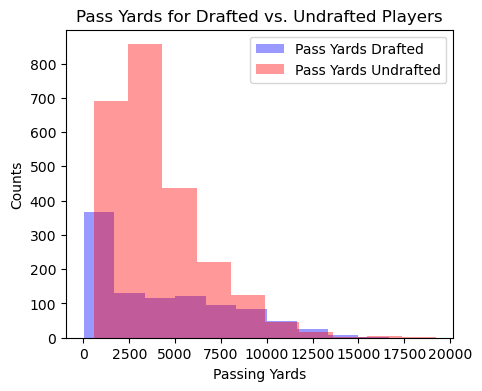

In [838]:
import matplotlib
from matplotlib import pyplot as plt

plt.hist(drafted_passing['Pass_Yds'], color='b', alpha= 0.4, label='Pass Yards Drafted')
plt.hist(undrafted_passing['Pass_Yds'], color='r', alpha = 0.4, label='Pass Yards Undrafted')
plt.xlabel('Passing Yards')
plt.ylabel('Counts')
plt.legend()
plt.title('Pass Yards for Drafted vs. Undrafted Players')
plt.savefig('figures/PassYds_DoubleHist.png', dpi=300, bbox_inches = 'tight')
plt.show()

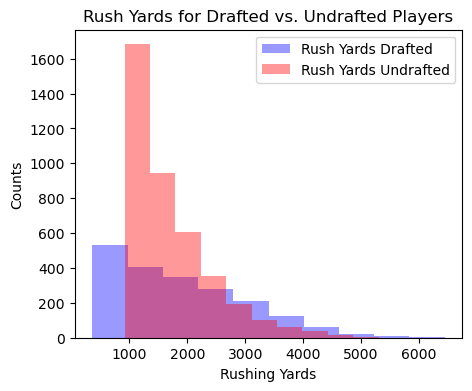

In [840]:
plt.hist(drafted_rushing['Rush_Yds'], color='b', alpha= 0.4, label='Rush Yards Drafted')
plt.hist(undrafted_rushing['Rush_Yds'], color='r', alpha = 0.4, label='Rush Yards Undrafted')
plt.xlabel('Rushing Yards')
plt.ylabel('Counts')
plt.legend()
plt.title('Rush Yards for Drafted vs. Undrafted Players')
plt.savefig('figures/RushYds_DoubleHist.png', dpi=300, bbox_inches = 'tight')
plt.show()

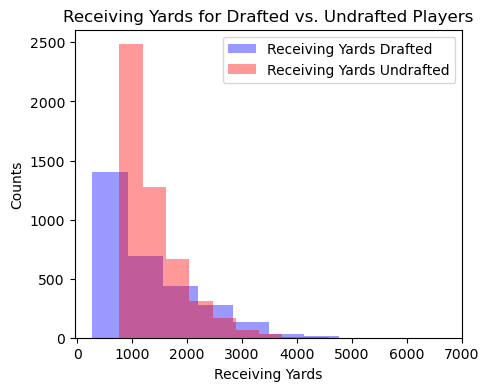

In [841]:
plt.hist(drafted_receiving['Rec_Yds'], color='b', alpha= 0.4, label='Receiving Yards Drafted')
plt.hist(undrafted_receiving['Rec_Yds'], color='r', alpha = 0.4, label='Receiving Yards Undrafted')
plt.xlabel('Receiving Yards')
plt.ylabel('Counts')
plt.legend()
plt.title('Receiving Yards for Drafted vs. Undrafted Players')
plt.savefig('figures/RecYds_DoubleHist.png', dpi=300, bbox_inches = 'tight')
plt.show()

## Merging Data and Filtering Data

In [842]:
# Passing Data
passing_cols = drafted_passing.columns.tolist()
all_passing = drafted_passing.merge(undrafted_passing, how='outer', on=passing_cols)

# Rushing Data
rushing_cols = drafted_rushing.columns.tolist()
all_rushing = drafted_rushing.merge(undrafted_rushing, how='outer', on=rushing_cols)

# Receiving Data
receiving_cols = drafted_receiving.columns.tolist()
all_receiving = drafted_receiving.merge(undrafted_receiving, how='outer', on=receiving_cols)

# Merging Data
common_cols = list(set(passing_cols).intersection(rushing_cols).intersection(receiving_cols))

all_players = all_passing.merge(all_rushing, how='outer', on=common_cols)
all_players = all_players.merge(all_receiving, how='outer', on= common_cols)

# Only include entries from 1993 onwards since the 7-round draft started in 1994
all_players = all_players[all_players['To'] >= 1993]
print(all_players['Round'].unique())

# Make Round variable categorical 
all_players['Round'] = pd.Categorical(all_players['Round'])

<IntegerArray>
[0, 4, 1, 7, 6, 2, 5, 3]
Length: 8, dtype: Int64


## EDA

In [843]:
# Dimensions
print('Dimensions:', all_players.shape)

Dimensions: (8825, 31)


In [844]:
# Missing values
print('All features added:', len(all_players.columns) == len(passing_cols) + len(rushing_cols) + len(receiving_cols) - 2*len(common_cols))
perc_missing_per_ftr = all_players.isnull().sum(axis=0)/all_players.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

All features added: True
fraction of missing values in features:
Pass_TD      0.785042
Cmp          0.785042
Pass_Att     0.785042
Inc          0.785042
Cmp%         0.785042
Pass_Yds     0.785042
Int          0.785042
TD%          0.785042
Int%         0.785042
Rate         0.785042
Pass_Y/A     0.785042
Pass_AY/A    0.785042
Pass_Y/C     0.785042
Pass_Y/G     0.785042
Pos          0.010085
Rush_Yds     0.662550
Rush_Att     0.662550
Rush_Y/A     0.662550
Rush_TD      0.662550
Rush_Y/G     0.662550
Rec_Yds      0.422436
Rec          0.422436
Y/R          0.422436
Rec_TD       0.422436
Rec_Y/G      0.422436
dtype: float64


In [845]:
# Data types
print(all_players.dtypes)

Player         object
Pass_TD       float64
Round        category
From            int64
To              int64
G               int64
Cmp           float64
Pass_Att      float64
Inc           float64
Cmp%          float64
Pass_Yds      float64
Int           float64
TD%           float64
Int%          float64
Rate          float64
Pass_Y/A      float64
Pass_AY/A     float64
Pass_Y/C      float64
Pass_Y/G      float64
Pos            object
Team           object
Rush_Yds      float64
Rush_Att      float64
Rush_Y/A      float64
Rush_TD       float64
Rush_Y/G      float64
Rec_Yds       float64
Rec           float64
Y/R           float64
Rec_TD        float64
Rec_Y/G       float64
dtype: object


In [846]:
# Target variable 
print(all_players['Round'].value_counts())

Round
0    6684
4     330
1     322
3     321
7     309
2     300
6     297
5     262
Name: count, dtype: int64


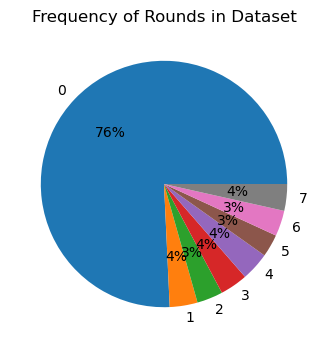

In [847]:
# Pie Chart Exploring Target Variable Counts
counts = all_players['Round'].value_counts().sort_values(ascending=False)
counts = counts.reindex([0,1,2,3,4,5,6,7])
plt.pie(counts, labels=counts.index, autopct='%1.0f%%')
plt.title('Frequency of Rounds in Dataset')
plt.savefig('figures/draft_round_freq.png', dpi=300)
plt.show()


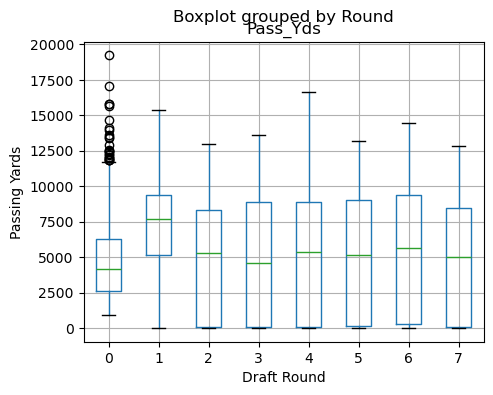

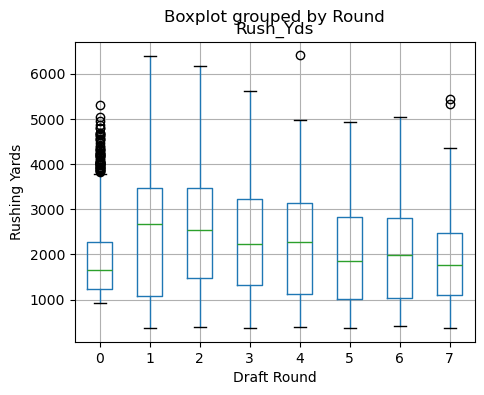

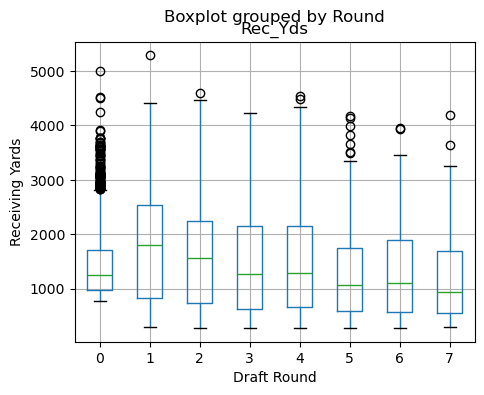

In [850]:
# Passing Yards per Round
all_players[['Pass_Yds', 'Round']].boxplot(by='Round')
plt.xlabel('Draft Round')
plt.ylabel('Passing Yards')
plt.savefig('figures/PassYds_by_Round.png', dpi=300)
plt.show()

# Rushing Yards per Round
all_players[['Rush_Yds', 'Round']].boxplot(by='Round')
plt.xlabel('Draft Round')
plt.ylabel('Rushing Yards')
plt.savefig('figures/RushYds_by_Round.png', dpi=300)

plt.show()

# Receiving Yards per Round
all_players[['Rec_Yds', 'Round']].boxplot(by='Round')
plt.xlabel('Draft Round')
plt.ylabel('Receiving Yards')
plt.savefig('figures/RecYds_by_Round.png', dpi=300)

plt.show()

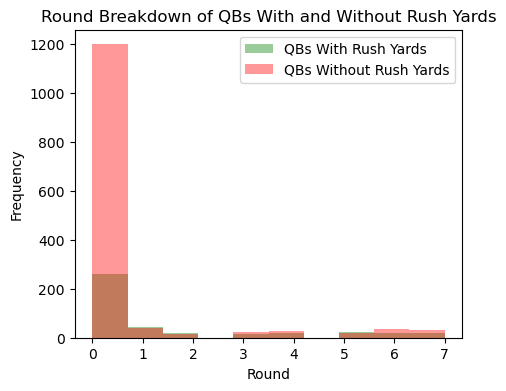

In [851]:
# QBs with and without rushing yards (Drafted and Undrafted)
plt.hist(all_players[(all_players['Rush_Yds'].notna()) & \
                     (all_players['Pos'] == 'QB')]['Round'], label='QBs With Rush Yards', \
                        alpha = 0.4, color = 'green')
plt.hist(all_players[(all_players['Rush_Yds'].isna()) & \
                     (all_players['Pos'] == 'QB')]['Round'], label='QBs Without Rush Yards', \
                        alpha = 0.4, color = 'red')
plt.xlabel('Round')
plt.ylabel('Frequency')
plt.title('Round Breakdown of QBs With and Without Rush Yards')
plt.legend()
plt.savefig('figures/AllQB_RushYds_Round.png', dpi=300)
plt.show()

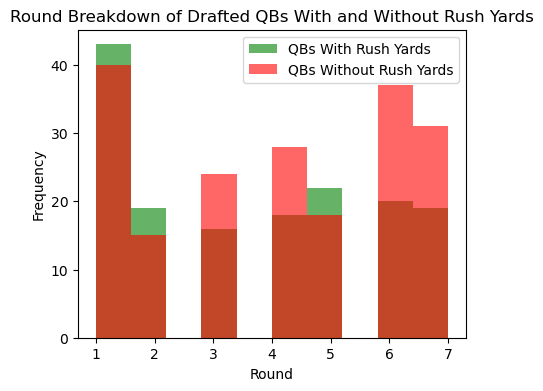

In [852]:
# QBs with and without rushing yards (Drafted only)
plt.hist(all_players[(all_players['Round'] !=0) & (all_players['Rush_Yds'].notna()) & \
                     (all_players['Pos'] == 'QB')]['Round'], label='QBs With Rush Yards', \
                        alpha = 0.6, color = 'green')
plt.hist(all_players[(all_players['Round'] !=0) & (all_players['Rush_Yds'].isna()) & \
                     (all_players['Pos'] == 'QB')]['Round'], label='QBs Without Rush Yards', \
                        alpha = 0.6, color = 'red')
plt.xlabel('Round')
plt.ylabel('Frequency')
plt.title('Round Breakdown of Drafted QBs With and Without Rush Yards')
plt.legend()
plt.savefig('figures/DraftedQB_RushYds_Round.png', dpi=300)
plt.show()

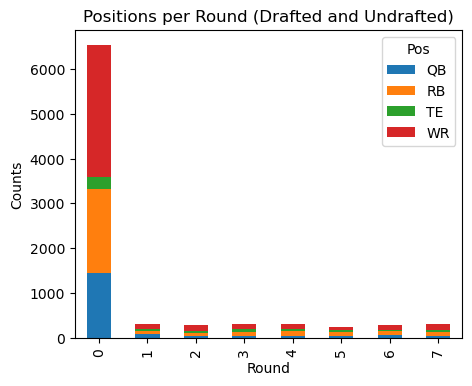

In [853]:
# Draft Rounds by Position (All)
skill_pos = ['QB', 'RB', 'WR', 'TE']
skill_pos_players = all_players[all_players['Pos'].isin(skill_pos)]

count_matrix = skill_pos_players.groupby(['Round', 'Pos'], observed=False).size().unstack()
count_matrix.plot(kind='bar', stacked='True')
plt.xlabel('Round')
plt.ylabel('Counts')
plt.title('Positions per Round (Drafted and Undrafted)')
plt.savefig('figures/pos_per_round_all.png', dpi=300)
plt.show()


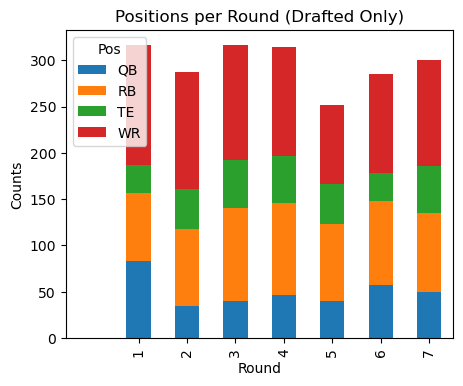

In [858]:
# Draft Rounds by Position (Drafted only)
skill_pos_drafted = all_players[(all_players['Round'] != 0) & (all_players['Pos'].isin(skill_pos))]
count_matrix = skill_pos_drafted.groupby(['Round', 'Pos'], observed=False).size().unstack()
count_matrix.plot(kind='bar', stacked='True')
plt.xlabel('Round')
plt.ylabel('Counts')
plt.title('Positions per Round (Drafted Only)')
plt.xticks(ticks=(1,2,3,4,5,6,7))
plt.savefig('figures/drafted_pos_per_round', dpi=300)
plt.show()


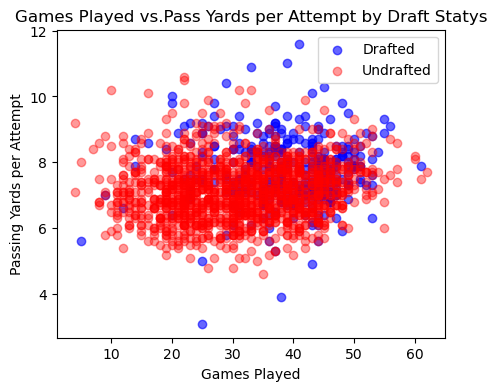

In [859]:
# Games Played vs. Pass Yards per Attempt by Players Drafted and Undrafted
plt.scatter(all_players[(all_players['Round'] != 0) & (all_players['Pos'] == 'QB')]['G'], \
            all_players[(all_players['Round'] != 0) & (all_players['Pos'] == 'QB')]['Pass_Y/A'], \
                color = 'b', alpha=0.6, label = 'Drafted')
plt.scatter(all_players[(all_players['Round'] == 0) & (all_players['Pos'] == 'QB')]['G'], \
            all_players[(all_players['Round'] == 0) & (all_players['Pos'] == 'QB')]['Pass_Y/A'], \
                color = 'r', alpha=0.4, label = 'Undrafted')
plt.xlabel('Games Played')
plt.ylabel('Passing Yards per Attempt')
plt.legend()
plt.title('Games Played vs.Pass Yards per Attempt by Draft Statys')
plt.savefig('figures/GamesPlayed_passYdsPerA.png', dpi=300)
plt.show()

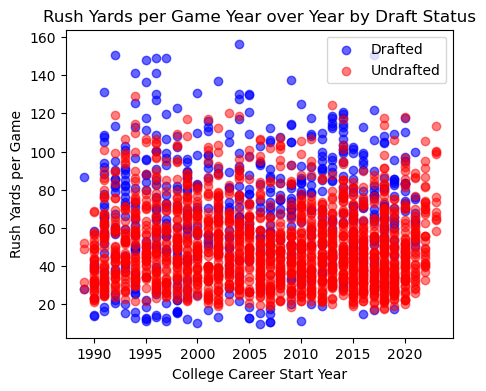

In [860]:
# Rush Yards per Game by year
plt.scatter((all_players[(all_players['Round'] !=0) & (all_players['Pos'] == 'RB')])['From'], \
            (all_players[(all_players['Round'] !=0) & (all_players['Pos'] == 'RB')])['Rush_Y/G'], \
                color = 'b', alpha=0.6, label = 'Drafted')
plt.scatter((all_players[(all_players['Round'] ==0) & (all_players['Pos'] == 'RB')])['From'], \
            (all_players[(all_players['Round'] ==0) & (all_players['Pos'] == 'RB')])['Rush_Y/G'], \
                color = 'r', alpha=0.5, label='Undrafted')
plt.legend()
plt.xlabel('College Career Start Year')
plt.ylabel('Rush Yards per Game')
plt.title('Rush Yards per Game Year over Year by Draft Status')
plt.savefig('figures/RushYdsPerG_byYear.png', dpi=300)
plt.show()

### Summary Statistics

In [861]:
# Passing Yards Drafted vs. Undrafted
print('Passing yards summary stats for drafted players:')
print(all_players[(all_players['Round'] !=0) & (all_players['Pos'] =='QB')]['Pass_Yds'].describe())
print()
print('Passing yards summary stats for undrafted players:')
print(all_players[(all_players['Round'] == 0) & (all_players['Pos'] == 'QB')]['Pass_Yds'].describe())



Passing yards summary stats for drafted players:
count      340.000000
mean      7459.752941
std       3312.814370
min         37.000000
25%       5328.000000
50%       7710.000000
75%       9775.000000
max      16646.000000
Name: Pass_Yds, dtype: float64

Passing yards summary stats for undrafted players:
count     1397.000000
mean      4797.303508
std       2718.556173
min        893.000000
25%       2634.000000
50%       4193.000000
75%       6318.000000
max      19217.000000
Name: Pass_Yds, dtype: float64


In [862]:
# Passer Rating for Drafted and Undrafted Players
print('Passer Rating summary stats for drafted players:')
print(all_players[(all_players['Round'] !=0) & (all_players['Pos'] =='QB')]['Rate'].describe())
print()
print('Passer Rating summary stats for undrafted players:')
print(all_players[(all_players['Round'] == 0) & (all_players['Pos'] == 'QB')]['Rate'].describe())



Passer Rating summary stats for drafted players:
count    340.000000
mean     139.431176
std       18.611717
min       77.900000
25%      129.800000
50%      138.550000
75%      150.625000
max      243.600000
Name: Rate, dtype: float64

Passer Rating summary stats for undrafted players:
count    1397.000000
mean      127.485540
std        14.557991
min        85.900000
25%       117.500000
50%       127.100000
75%       137.200000
max       179.100000
Name: Rate, dtype: float64


In [863]:
# Passing Attempts for Drafted and Undrafted Players
print('Passing attempts summary stats for drafted players:')
print(all_players[(all_players['Round'] !=0) & (all_players['Pos'] =='QB')]['Pass_Att'].describe())
print()
print('Passing attempts summary stats for undrafted players:')
print(all_players[(all_players['Round'] == 0) & (all_players['Pos'] == 'QB')]['Pass_Att'].describe())



Passing attempts summary stats for drafted players:
count     340.000000
mean      956.067647
std       426.583102
min         4.000000
25%       666.500000
50%       964.000000
75%      1261.250000
max      2183.000000
Name: Pass_Att, dtype: float64

Passing attempts summary stats for undrafted players:
count    1397.000000
mean      668.533286
std       357.634878
min       126.000000
25%       386.000000
50%       602.000000
75%       884.000000
max      2436.000000
Name: Pass_Att, dtype: float64


In [864]:
# Games played for drafted and undrafted players
print('Games played summary stats for drafted players:')
print(all_players[(all_players['Round'] !=0)]['G'].describe())
print()
print('Games played summary stats for undrafted players:')
print(all_players[(all_players['Round'] == 0)]['G'].describe())



Games played summary stats for drafted players:
count    2141.000000
mean       39.268566
std         8.911365
min         4.000000
25%        34.000000
50%        40.000000
75%        46.000000
max        66.000000
Name: G, dtype: float64

Games played summary stats for undrafted players:
count    6684.000000
mean       37.902454
std        10.150052
min         4.000000
25%        31.000000
50%        40.000000
75%        45.000000
max        66.000000
Name: G, dtype: float64


In [865]:
# Rush yards per attempt for drafted and undrafted players
print('Rush Yards per Attempt summary stats for drafted players:')
print(all_players[(all_players['Round'] !=0)]['Rush_Y/A'].describe())
print()
print('Rush Yards per Attempt summary stats for undrafted players:')
print(all_players[(all_players['Round'] == 0)]['Rush_Y/A'].describe())


Rush Yards per Attempt summary stats for drafted players:
count    803.000000
mean       5.210212
std        1.284774
min        1.100000
25%        4.600000
50%        5.300000
75%        5.900000
max       11.800000
Name: Rush_Y/A, dtype: float64

Rush Yards per Attempt summary stats for undrafted players:
count    2175.000000
mean        4.870713
std         0.807025
min         1.800000
25%         4.400000
50%         4.800000
75%         5.300000
max         9.900000
Name: Rush_Y/A, dtype: float64


In [867]:
# Y/Rfor drafted and undrafted players
print('Yards per reception summary stats for drafted players:')
print(all_players[(all_players['Round'] !=0)]['Y/R'].describe())
print()
print('Yards per reception summary stats for undrafted players:')
print(all_players[(all_players['Round'] == 0)]['Y/R'].describe())


Yards per reception summary stats for drafted players:
count    1637.000000
mean       13.228161
std         3.131755
min         4.900000
25%        10.900000
50%        13.400000
75%        15.400000
max        25.500000
Name: Y/R, dtype: float64

Yards per reception summary stats for undrafted players:
count    3460.000000
mean       13.535376
std         2.501212
min         5.800000
25%        11.900000
50%        13.300000
75%        15.000000
max        28.700000
Name: Y/R, dtype: float64


## Handling Missing Values

In [868]:
all_players["Pos"] = all_players["Pos"].replace(np.nan, 0)

In [869]:
# print(all_players.head())
def assign_position(row):
    if row['Pos'] == 0:  # Check if position is NA
        # print('test')
        max_yards = max(row[['Pass_Yds', 'Rush_Yds', 'Rec_Yds']].dropna())
        # print(max_yards)
        if max_yards == row['Pass_Yds']:
            return 'QB'
            # row['Pos'] = 'QB'
        elif max_yards == row['Rush_Yds']:
            return 'RB'
            # row['Pos'] = 'RB'
        elif max_yards == row['Rec_Yds']:
            return 'WR'
            # row['Pos'] = 'WR'
    else:
        return row['Pos']
        
        
# Apply the function to the DataFrame
all_players['Pos'] = all_players.apply(assign_position, axis=1)
print(all_players['Pos'])

0        CB
1        CB
2        CB
3        CB
4        CB
         ..
15241    WR
15242    WR
15243    WR
15244    WR
15245    WR
Name: Pos, Length: 8825, dtype: object


In [870]:
# Ensure function worked properly
print(all_players[all_players['Pos'] == 0])

Empty DataFrame
Columns: [Player, Pass_TD, Round, From, To, G, Cmp, Pass_Att, Inc, Cmp%, Pass_Yds, Int, TD%, Int%, Rate, Pass_Y/A, Pass_AY/A, Pass_Y/C, Pass_Y/G, Pos, Team, Rush_Yds, Rush_Att, Rush_Y/A, Rush_TD, Rush_Y/G, Rec_Yds, Rec, Y/R, Rec_TD, Rec_Y/G]
Index: []

[0 rows x 31 columns]


In [871]:
# Should not contain missing values
all_players["Pos"].unique()

array(['CB', 'DB', 'DL', 'FB', 'HB', 'KR', 'LB', 'P', 'PR', 'QB', 'RB',
       'S', 'SE', 'TE', 'UT', 'WR'], dtype=object)

In [872]:
print('Missing Position Values:', all_players['Pos'].isnull().sum(axis=0)/all_players.shape[0])
print('New Value Counts:', all_players['Pos'].value_counts())

Missing Position Values: 0.0
New Value Counts: Pos
WR    3815
RB    2506
QB    1818
TE     570
DB      49
LB      17
FB      15
KR      10
DL       8
CB       6
HB       3
P        3
S        2
PR       1
SE       1
UT       1
Name: count, dtype: int64


In [873]:
perc_missing_per_ftr = all_players.isnull().sum(axis=0)/all_players.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

fraction of missing values in features:
Pass_TD      0.785042
Cmp          0.785042
Pass_Att     0.785042
Inc          0.785042
Cmp%         0.785042
Pass_Yds     0.785042
Int          0.785042
TD%          0.785042
Int%         0.785042
Rate         0.785042
Pass_Y/A     0.785042
Pass_AY/A    0.785042
Pass_Y/C     0.785042
Pass_Y/G     0.785042
Rush_Yds     0.662550
Rush_Att     0.662550
Rush_Y/A     0.662550
Rush_TD      0.662550
Rush_Y/G     0.662550
Rec_Yds      0.422436
Rec          0.422436
Y/R          0.422436
Rec_TD       0.422436
Rec_Y/G      0.422436
dtype: float64


In [874]:
# Assigning all missing values to 0
all_players = all_players.replace(np.nan, 0)

In [875]:
perc_missing_per_ftr = all_players.isnull().sum(axis=0)/all_players.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

fraction of missing values in features:
Series([], dtype: float64)


## Prep Data For Splitting

In [876]:
print(all_players['Round'].value_counts())

Round
0    6684
4     330
1     322
3     321
7     309
2     300
6     297
5     262
Name: count, dtype: int64


In [877]:
# Create feature matrix and target variable
X = all_players.drop(columns=['Player','Round'])
y = all_players['Round']

# Save feature names before preprocessing
feature_names = X.columns

# Adjust Team column so we can use Multilabelbinarizer
X['Team'] = X['Team'].apply(lambda x: x.split(','))

# Ensure Positions are listed as strings
X['Pos'] = X['Pos'].astype(str)


# Training the Models

In [878]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.base import BaseEstimator, TransformerMixin


class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        self.mlb.fit(X)
        return self

    def transform(self, X):
        return self.mlb.transform(X)
    
    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            input_features = ['Team']
        return [f"{input_features[0]}_{cls}" for cls in self.mlb.classes_]


# Function for ML Pipeline
def MLpipe_KFold_Accuracy(X, y, ML_algo, model_name, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies 
    KFold with 4 folds to validation set.
    The accuracy is maximized in cross-validation.

    This function does the following:

    1. Loops through 3 different random states
    2. Split the data 
    3. Fits a model using GridSearchCV with KFold and the predefined Preprocessor 
    4. Calculates the model's accuracy on the test set 
    5. Returns a list of 3 test scores and 3 best models 
    '''

    nr_states = 3
    
    # lists to be returned 
    test_scores = []
    models = []
    predictions = []
    y_true = []
    X_test_sets = []
    ftrs_names_prep = []
    best_params = []

  

    for i in range(nr_states):
        # Split data
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, 
                                                               stratify=y, random_state=i)
        
        # Preprocess the data
        onehot_enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        standard_scaler = StandardScaler()
        minmax_scaler = MinMaxScaler()

        onehot_fts = ['Pos', 'From', 'To']

        std_fts = ['Pass_TD', 'G', 'Cmp', 'Pass_Att', 'Inc', 'Pass_Yds', 'Int', \
            'Rate', 'Pass_Y/A', 'Pass_AY/A', 'Pass_Y/C', 'Pass_Y/G', 'Rush_Yds', \
                'Rush_Att', 'Rush_Y/A', 'Rush_TD', 'Rush_Y/G', 'Rec_Yds', 'Rec', \
                'Y/R', 'Rec_TD', 'Rec_Y/G']

        minmax_fts = ['Cmp%', 'TD%', 'Int%']

        preprocessor = ColumnTransformer(
            transformers=[
            ('multlabelbinarizer', MultiLabelBinarizerTransformer(), 'Team'),
            ('onehot', onehot_enc, onehot_fts), 
            ('std', standard_scaler, std_fts),  
            ('minmax', minmax_scaler, minmax_fts)
            ])

        # Stratified splitter
        kf = StratifiedKFold(n_splits = 4, shuffle = True, random_state = i)

        pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),      # Apply the ColumnTransformer
        ('scaler', StandardScaler()),        # Ensure all features are scaled to mean=0, std=1
        (model_name, ML_algo)])

        grid = GridSearchCV(pipe, param_grid=param_grid, 
                            scoring='accuracy', 
                            cv=kf, return_train_score=True, n_jobs=-1, 
                            verbose=True, refit=True)
        
        grid.fit(X_other, y_other)

        # Retrieve the fitted preprocessor
        fitted_preprocessor = grid.best_estimator_.named_steps['preprocessor']

        # Get feature names from the fitted preprocessor
        ftrs_names_prep.append(fitted_preprocessor.get_feature_names_out())

        # Store results
        results = pd.DataFrame(grid.cv_results_)

        print('best model parameters:',grid.best_params_)
        print('validation score:',grid.best_score_) # mean validation score over all iterations
        
        models.append(grid)
        y_test_pred = models[-1].predict(X_test)
        test_scores.append(accuracy_score(y_test, y_test_pred))
        predictions.append(y_test_pred)
        y_true.append(y_test)
        X_test_sets.append(X_test)
        best_params.append(grid.best_params_)


    print("")
    print('MEAN TEST SCORES:', np.mean(test_scores))
    print('SD TEST SCORES:', np.std(test_scores))
    return test_scores, models, predictions, y_true, X_test_sets, results, ftrs_names_prep, best_params

In [635]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost

clf_XGB = xgboost.XGBClassifier(eval_metric = 'logloss', random_state=42)
param_grid_xgb = {
    'xgbclassifier__learning_rate': [0.03],
    'xgbclassifier__reg_alpha': [0.001, 0.01, 0.1, 1, 10],
    'xgbclassifier__reg_lambda': [0.001, 0.01, 0.1, 1, 10],
    'xgbclassifier__max_depth': [1, 3, 10, 20],
}

print("XGBOOST CLASSIFICATION")
xgboost_test_scores, xgboost_best_model, xgb_predictions, xgb_true_vals, xgb_X_test_sets, xgb_results, xgb_ftr_names_prep, xgb_best_params = \
      MLpipe_KFold_Accuracy(X, y, clf_XGB, "xgbclassifier", param_grid_xgb);


XGBOOST CLASSIFICATION
Fitting 4 folds for each of 100 candidates, totalling 400 fits
best model parameters: {'xgbclassifier__learning_rate': 0.03, 'xgbclassifier__max_depth': 10, 'xgbclassifier__reg_alpha': 0.1, 'xgbclassifier__reg_lambda': 1}
validation score: 0.7715297450424929
Fitting 4 folds for each of 100 candidates, totalling 400 fits
best model parameters: {'xgbclassifier__learning_rate': 0.03, 'xgbclassifier__max_depth': 20, 'xgbclassifier__reg_alpha': 0.01, 'xgbclassifier__reg_lambda': 10}
validation score: 0.7702549575070822
Fitting 4 folds for each of 100 candidates, totalling 400 fits
best model parameters: {'xgbclassifier__learning_rate': 0.03, 'xgbclassifier__max_depth': 10, 'xgbclassifier__reg_alpha': 1, 'xgbclassifier__reg_lambda': 10}
validation score: 0.7736543909348441

MEAN TEST SCORES: 0.7688385269121812
SD TEST SCORES: 0.004873838678211142


In [637]:
# Random Forest 
clf_rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
              'randomforestclassifier__max_depth': [1, 3, 10, 50], 
              'randomforestclassifier__max_features': [0.5, 0.75, 1.0] 
              } 

print("RANDOM FOREST CLASSIFICATION")
rf_test_scores, rf_best_model, rf_predictions, rf_true_vals, rf_X_test_sets, rf_results, rf_ftrs_names_prep, rf_best_params = \
MLpipe_KFold_Accuracy(X, y, clf_rf, "randomforestclassifier", param_grid_rf)



RANDOM FOREST CLASSIFICATION
Fitting 4 folds for each of 12 candidates, totalling 48 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.7722379603399433
Fitting 4 folds for each of 12 candidates, totalling 48 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.7708215297450425
Fitting 4 folds for each of 12 candidates, totalling 48 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.7722379603399433

MEAN TEST SCORES: 0.7711048158640227
SD TEST SCORES: 0.001667943506388639


In [638]:
# SVC
clf_SVC = SVC(random_state = 42)
param_grid_svc = {
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10],
    'svc__C': [0.01, 0.1, 1, 10, 100]
}
print("SUPPORT VECTOR MACHINE CLASSIFICATION")
svc_test_scores, svc_best_model, svc_predictions, svc_true_vals, svc_X_test_sets, svc_results, svc_ftrs_names_prep, svc_best_params = \
MLpipe_KFold_Accuracy(X, y, clf_SVC, "svc", param_grid_svc);



SUPPORT VECTOR MACHINE CLASSIFICATION
Fitting 4 folds for each of 25 candidates, totalling 100 fits
best model parameters: {'svc__C': 10, 'svc__gamma': 0.001}
validation score: 0.7689801699716714
Fitting 4 folds for each of 25 candidates, totalling 100 fits
best model parameters: {'svc__C': 10, 'svc__gamma': 0.001}
validation score: 0.7674220963172804
Fitting 4 folds for each of 25 candidates, totalling 100 fits
best model parameters: {'svc__C': 10, 'svc__gamma': 0.001}
validation score: 0.7681303116147309

MEAN TEST SCORES: 0.7669499527856468
SD TEST SCORES: 0.004633746608644126


In [642]:
# KNN
clf_knn = KNeighborsClassifier()

param_grid_knn = {
    'kneighborsclassifier__n_neighbors': [1, 3, 5, 10, 15],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['minkowski', 'manhattan', 'chebyshev']
}

print("K NEAREST NEIGHBORS CLASSIFICATION")
knn_test_scores, knn_best_model, knn_preds, knn_true_vals, knn_X_test_sets, knn_results, knn_ftr_names_prep, knn_best_params = \
MLpipe_KFold_Accuracy(X, y, clf_knn, "kneighborsclassifier", param_grid_knn)

K NEAREST NEIGHBORS CLASSIFICATION
Fitting 4 folds for each of 30 candidates, totalling 120 fits
best model parameters: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'uniform'}
validation score: 0.7603399433427762
Fitting 4 folds for each of 30 candidates, totalling 120 fits
best model parameters: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'uniform'}
validation score: 0.7593484419263457
Fitting 4 folds for each of 30 candidates, totalling 120 fits
best model parameters: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'uniform'}
validation score: 0.7594900849858357

MEAN TEST SCORES: 0.759395656279509
SD TEST SCORES: 0.0007066397331017897


Baseline Accuracy: 0.7573937677053825


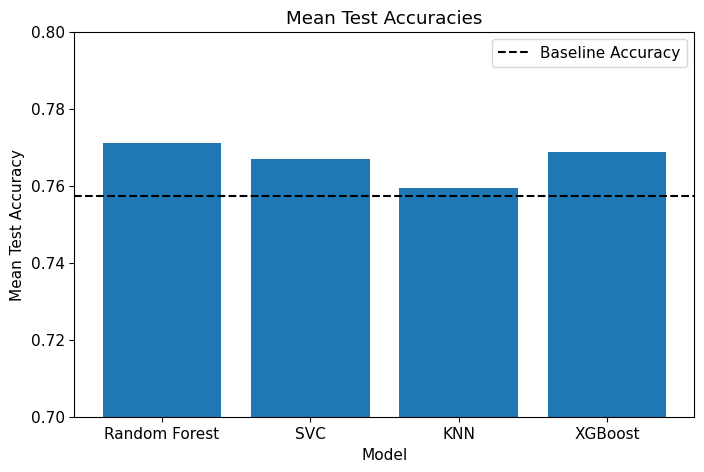

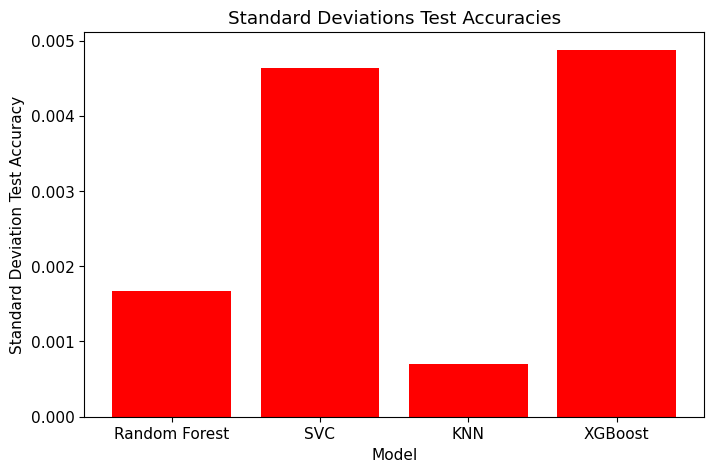

In [644]:
model_scores = {
    "Random Forest": rf_test_scores,
    "SVC": svc_test_scores,
    "KNN": knn_test_scores,
    "XGBoost": xgboost_test_scores
}

trained_models = {
    "Random Forest": rf_best_model,
    "SVC": svc_best_model,
    "KNN": knn_best_model,
    "XGBoost": xgboost_best_model
}

# Calculating mean and standard deviations of each model
model_names = list(model_scores.keys())
means = [np.mean(scores) for scores in model_scores.values()]
stds = [np.std(scores) for scores in model_scores.values()]


# Baseline Accuracy
baseline_accuracy = np.max(y.value_counts()) / len(y)
print('Baseline Accuracy:', baseline_accuracy)

# Plotting Means
plt.figure(figsize=(8,5))
x_positions = np.arange(len(model_names))

plt.bar(x_positions, means)
plt.xticks(x_positions, model_names)
plt.axhline(y = baseline_accuracy, color = 'black', 
            linestyle = '--', label = "Baseline Accuracy")
plt.ylim(0.7, 0.8)
plt.ylabel("Mean Test Accuracy")
plt.xlabel("Model")
plt.title("Mean Test Accuracies")
plt.legend()
plt.savefig('figures/mean_test_acc_all_models.png', dpi=300)
plt.show()



# Plotting Standard Deviations
plt.figure(figsize=(8,5))
x_positions = np.arange(len(model_names))

plt.bar(x_positions, stds, color = 'red')
plt.xticks(x_positions, model_names)
plt.ylabel("Standard Deviation Test Accuracy")
plt.xlabel("Model")
plt.title("Standard Deviations Test Accuracies")
plt.savefig('figures/sd_test_acc_all_models.png', dpi=300)
plt.show()



In [645]:
# Determining the best model
best_model_key = model_names[np.argmax(means)]
best_final_model = trained_models[best_model_key][np.argmax(model_scores[best_model_key])]

In [646]:
print(f"Our best model is our {best_model_key} model, which is about {np.round((np.mean(model_scores[best_model_key]) - baseline_accuracy) / np.std(model_scores[best_model_key]), 2)} standard deviations above the baseline" )

Our best model is our Random Forest model, which is about 8.22 standard deviations above the baseline


In [647]:
best_final_model

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('multlabelbinarizer',
                                                                         MultiLabelBinarizerTransformer(),
                                                                         'Team'),
                                                                        ('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Pos',
                                                                          'From',
                                                                          'To']),
                                                                        ('std',
                                                                         StandardScaler(),
                                                                         ['Pass_TD',
                                                                          'G',
                                                                          'Cmp',
                                                                          'Pass_...
                                                                          'Rec_TD',
                                                                          'Rec_Y/G']),
                                                                        ('minmax',
                                                                         MinMaxScaler(),
                                                                         ['Cmp%',
                                                                          'TD%',
                                                                          'Int%'])])),
                                       ('scaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [1, 3, 10, 50],
                         'randomforestclassifier__max_features': [0.5, 0.75,
                                                                  1.0]},
             return_train_score=True, scoring='accuracy', verbose=True)

In [651]:
# Examining best hyperparameters for each algorithm
print("Best XGBoost Params", xgb_best_params)
print("Best Random Forest Params", rf_best_params)
print("Best SVC Params", svc_best_params)
print("Best KNN Params", knn_best_params)

Best XGBoost Params [{'xgbclassifier__learning_rate': 0.03, 'xgbclassifier__max_depth': 10, 'xgbclassifier__reg_alpha': 0.1, 'xgbclassifier__reg_lambda': 1}, {'xgbclassifier__learning_rate': 0.03, 'xgbclassifier__max_depth': 20, 'xgbclassifier__reg_alpha': 0.01, 'xgbclassifier__reg_lambda': 10}, {'xgbclassifier__learning_rate': 0.03, 'xgbclassifier__max_depth': 10, 'xgbclassifier__reg_alpha': 1, 'xgbclassifier__reg_lambda': 10}]
Best Random Forest Params [{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}, {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}, {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}]
Best SVC Params [{'svc__C': 10, 'svc__gamma': 0.001}, {'svc__C': 10, 'svc__gamma': 0.001}, {'svc__C': 10, 'svc__gamma': 0.001}]
Best KNN Params [{'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'uniform'},

# Inspecting Best Model

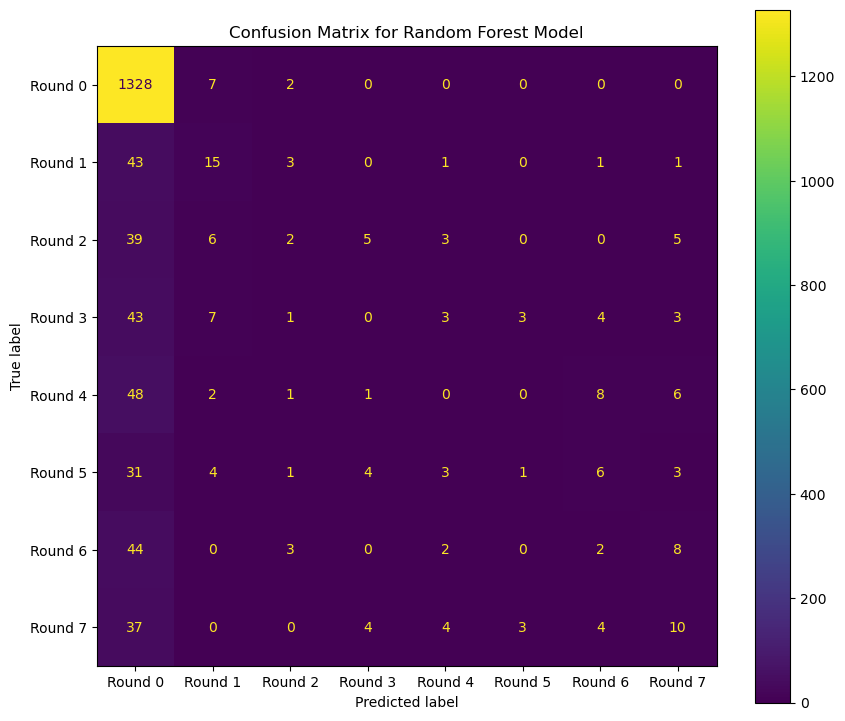

In [798]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# We choose the first random state to inspect our model
cm = confusion_matrix(rf_true_vals[0], rf_predictions[0])
disp = ConfusionMatrixDisplay(cm, display_labels = ['Round 0', 'Round 1', 'Round 2', \
                                                    'Round 3', 'Round 4', 'Round 5', \
                                                        'Round 6', 'Round 7'])
fig, ax = plt.subplots(figsize = (10,9))
plt.title('Confusion Matrix for Random Forest Model')
disp.plot(ax=ax)
plt.savefig('figures/cm_best_model.png', dpi=300)
plt.show()


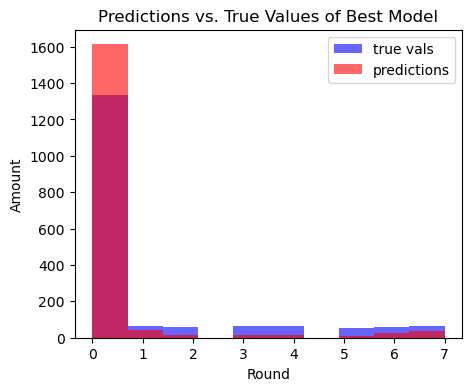

In [829]:
plt.hist(rf_true_vals[0], label = "true vals", alpha = 0.6, color = 'blue')
plt.hist(rf_predictions[0], label = "predictions", alpha = 0.6, color = 'red')
plt.ylabel("Amount")
plt.xlabel("Round")
plt.title("Predictions vs. True Values of Best Model")
plt.legend()
plt.savefig('figures/preds_vs_true_best_model.png', dpi=300, bbox_inches = 'tight')
plt.show()


# Feature Importances

In [ ]:
# Save best models
import pickle 
file = open('results/best_models.save', 'wb')
pickle.dump((rf_best_model, rf_X_test_sets, rf_true_vals), file)
file.close()

In [662]:
# Feature importance
best_pipeline = rf_best_model[0].best_estimator_
rf_feature_importances = best_pipeline.named_steps['randomforestclassifier'].feature_importances_

importance_df = pd.DataFrame({
    'Feature': rf_ftrs_names_prep[0],
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

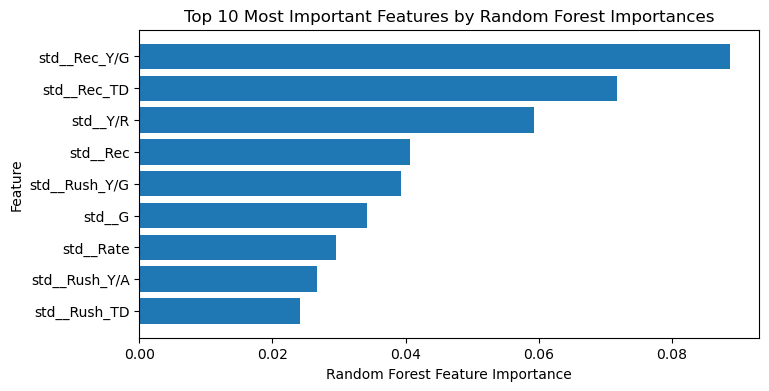

In [828]:
# Plotting Feature Importance
plt.figure(figsize=(8,4))
plt.barh(importance_df['Feature'][1:10], importance_df['Importance'][1:10])
plt.gca().invert_yaxis()
plt.xlabel("Random Forest Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features by Random Forest Importances")
plt.savefig('figures/best_model_feature_importances.png', dpi=300, bbox_inches = 'tight')
plt.show()


In [674]:
import shap
shap.initjs()

# Create the explainer object with the random forest model
explainer = shap.TreeExplainer(best_pipeline.named_steps['randomforestclassifier'])

# Transform the test set
X_test_transformed = rf_best_model[0].best_estimator_[0].transform(rf_X_test_sets[0])
print(X_test_transformed.shape)

# Calculate shap values
shap_values = explainer.shap_values(X_test_transformed)

(1765, 246)


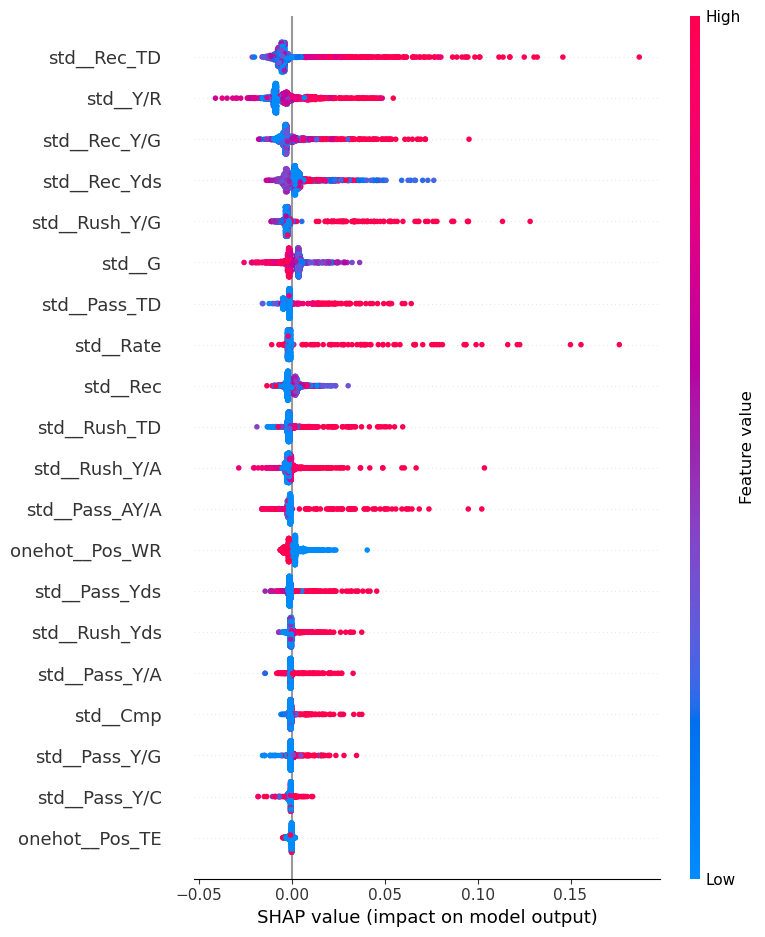

In [675]:
# Global feature importance shap values for Round 1
shap.summary_plot(shap_values[:,:,1], X_test_transformed,feature_names = rf_ftrs_names_prep[0], show=False)
plt.savefig('figures/global_shap_summary.png', dpi=300)
plt.show()

(1765, 246, 8)
246


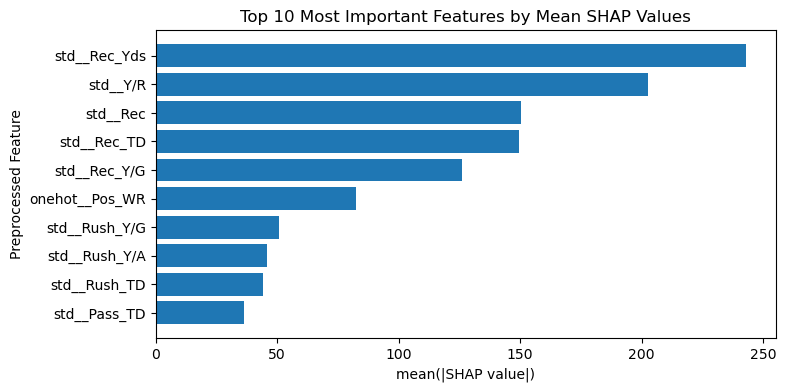

In [ ]:
# Check dimensions of shap_values and feature_names
print(shap_values.shape)  # Ensure shape is correct
print(len(rf_ftrs_names_prep[0]))  # Ensure matches second dimension of shap_values

# Compute global SHAP feature importance
shap_summary = np.sum(np.abs(shap_values), axis=(0, 2))  # Aggregate over samples and classes


# Sort by importance
indcs = np.argsort(shap_summary)

# Plot the top 10 features
plt.figure(figsize=(8, 4))
plt.barh(rf_ftrs_names_prep[0][indcs[-10:]], shap_summary[indcs[-10:]])  # Plot top 10
plt.xlabel('mean(|SHAP value|)')
plt.ylabel("Preprocessed Feature")
plt.title("Top 10 Most Important Features by Mean SHAP Values")
plt.savefig('figures/mean_shap_importances.png', dpi=300,  bbox_inches='tight')
plt.show()


In [793]:
import plotly.io as pio


index = 28 # the index of the point to explain
round = 0 # the round we want to see the prediction of 
print('Baseline probability;', explainer.expected_value[round])# model prediction
print('True Value:', rf_true_vals[0].iloc[index])


force_plot_round0 = shap.force_plot(explainer.expected_value[round], shap_values[index,:,round], 
                features = X_test_transformed[index,:],feature_names = rf_ftrs_names_prep[0])
shap.save_html('figures/force_plot_round0.html', force_plot_round0)
display(force_plot_round0)






Baseline probability; 0.7577847025495749
True Value: 0


In [794]:
index = 1298 # the index of the point to explain
round = 2 # the round we want to see the prediction of 
print('Baseline probability;', explainer.expected_value[round]) # model prediction
print('True Value:', rf_true_vals[0].iloc[index])

force_plot_round2 = shap.force_plot(explainer.expected_value[round], shap_values[index,:,round], features = X_test_transformed[index,:],feature_names = rf_ftrs_names_prep[0])
shap.save_html('figures/force_plot_round2.html', force_plot_round2)
display(force_plot_round2)


Baseline probability; 0.03419263456090652
True Value: 2


In [795]:
index = 999 # the index of the point to explain
round = 1 # the round we want to see the prediction of 
print('Baseline Probability:', explainer.expected_value[round])
print('True Value:', rf_true_vals[0].iloc[index])


force_plot_round1 = shap.force_plot(explainer.expected_value[round], shap_values[index,:,round], features = X_test_transformed[index,:],feature_names = rf_ftrs_names_prep[0])
shap.save_html('figures/force_plot_round1.html', force_plot_round1)
display(force_plot_round1)

Baseline Probability: 0.03637677053824362
True Value: 1
